In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats
import random
random.seed(42)


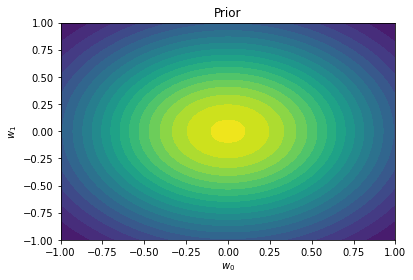

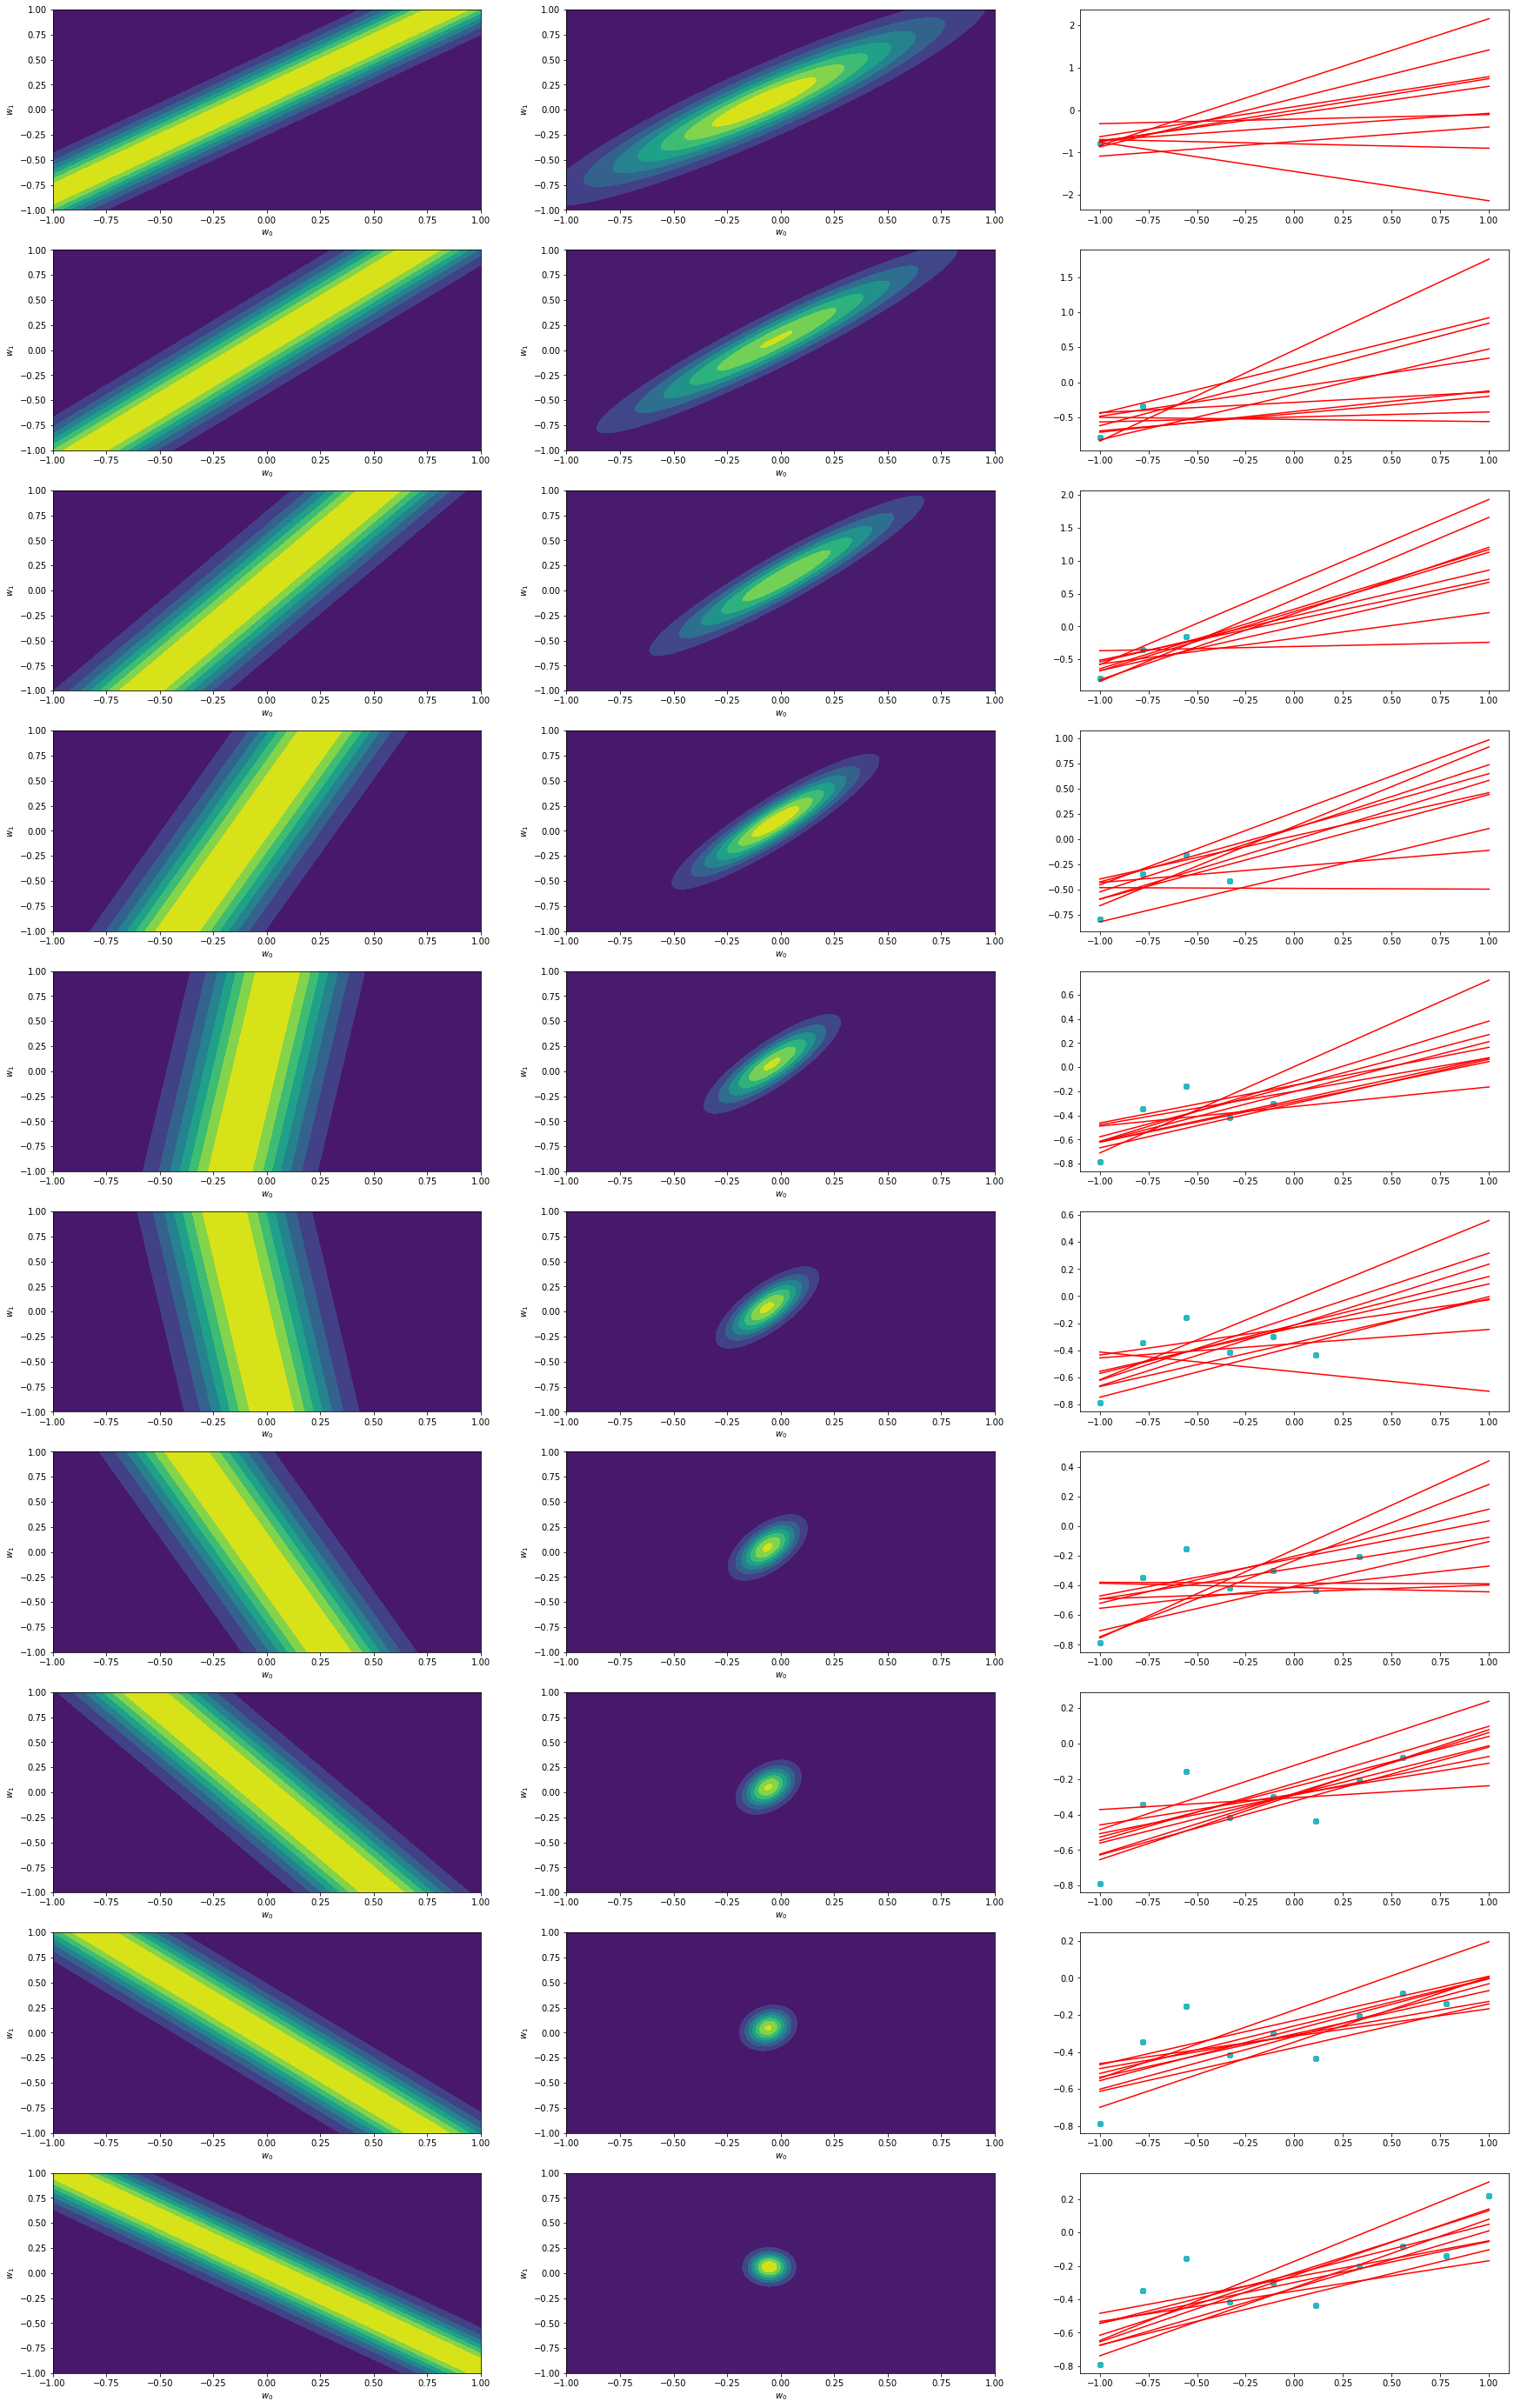

In [23]:
n=10
x_i = np.linspace(-1,1,n)
y_i = []
for x in x_i:
  y = -0.3 + 0.5*x + np.random.normal(0,0.2)
  y_i.append(y)
def likelihood(x,w,y):
  const = 0.2*(np.sqrt(np.pi*2))
  return (1/const)*np.exp(-0.5*(y-(w @ x)/0.2)**2)
def post(m0,s0,phi,t):
  beta = 25
  phi = np.array(phi).reshape(1, 2)
  sn = np.linalg.inv(np.linalg.inv(s0) + beta*(np.transpose(phi)@phi))
  m0 = np.array(m0).reshape(2, 1)
  t = [t]
  mn = sn@(np.linalg.inv(s0)@m0 + beta*(np.transpose(phi).reshape(2, 1)@t))
  mn = list(mn.reshape(1, 2)[0])
  return mn,sn

fig = plt.figure()
w = np.linspace(-1, 1, 100)

W = np.dstack(np.meshgrid(w, w))
m0=np.array([0,0])
s0=[[0.5,0],[0,0.5]]
prior = stats.multivariate_normal.pdf(W, m0, s0)
plt.contourf(w, w, prior,20)
plt.title("Prior")
plt.xlabel('$w_{0}$')
plt.ylabel('$w_{1}$')
count=0

fig,axs= plt.subplots(n,3,figsize=(30,50))
for i in range(n):
    x_vals=x_i[:i+1]
    y_vals=y_i[:i+1]
    phi =[1,x_i[i]]
    l = likelihood(phi, W, y_i[i])
    posterior = prior * l[:,:]
    prior = posterior
    axs[count,0].contourf(w,w, l[:,:])
    axs[count,1].contourf(w,w, posterior)
    axs[count,0].set_xlabel("$w_0$")
    axs[count,1].set_xlabel("$w_0$")
    axs[count,0].set_ylabel("$w_1$")
    axs[count,1].set_ylabel("$w_1$")
    mn,sn = post(m0,s0,phi,[y_i[i]])
    w0,w1=np.random.multivariate_normal(mn, sn, 10).T
    for i in range(n):
        axs[count,2].plot(x_i,w0[i]+w1[i]*x_i,color="red")
        axs[count,2].scatter(x_vals,y_vals)
    m0=mn
    s0=sn
    count+=1
fig.savefig('Output4')